## Trabajo práctico 2
### Alumnos: Francisco Frusto Alvarado, Ezequiel Kaplan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Inicializacion de pesos
W1 = np.array(np.random.random((5,6)))
b1 = np.array(np.random.random((5,1)))

W2 = np.array(np.random.random((1,5)))
b2 = np.array(np.random.random((1,1)))

theta = np.array([W1, b1, W2, b2])
print(theta)


[array([[0.91720357, 0.13226415, 0.89939468, 0.72433672, 0.99953038,
         0.63860767],
        [0.62080537, 0.99762742, 0.31846332, 0.13226918, 0.85954498,
         0.04778536],
        [0.2095091 , 0.11604298, 0.23397057, 0.85383706, 0.36093569,
         0.85258556],
        [0.50423293, 0.06159168, 0.88084617, 0.59724967, 0.91246413,
         0.46436738],
        [0.27846516, 0.29893154, 0.77843189, 0.75641149, 0.79134291,
         0.99562625]])
 array([[0.38970372],
        [0.59185722],
        [0.01925142],
        [0.63295542],
        [0.74888875]])
 array([[0.43655777, 0.68909641, 0.71773409, 0.40365686, 0.04540345]])
 array([[0.13368576]])]


/var/folders/d8/8cyzttj53pq_1z61ld5c5gpm0000gn/T/ipykernel_87056/1755964871.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  theta = np.array([W1, b1, W2, b2])


Para implementar la funcion forward, vamos a hacer los cálculos de a pasos, sabiendo:

$\newline f_{\theta}(\mathrm{\mathbf{x}}) = W_{2} \ \sigma (W_{1} \mathrm{\mathbf{x}} + b_{1}) + b{2} $

En una primera instancia calculamos $ z_{1} = W_{1} \mathrm{\mathbf{x}} + b_{1}$ en la que hacemos el producto punto entre $\mathrm{\mathbf{x}}$ y $W_{1}$ y luego le sumamos el vector $b_{1}$. 

En un segundo paso, habiendo creado la funcion sigmoid que calcula: $\sigma(x) = \frac{1}{1 + e^{-x}}$ vamos a aplicarle esta funcion a los elementos de $z_{1}$

En un tercer paso, calculamos el resultado final en el que se hace el producto punto entre $W_{2}$ y el resultado anterior y ademas, se le suma el vector $b_{2}$

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def forward(theta, x):
    W1, b1, W2, b2 = theta
    x = np.array(x)
    x = x[:, np.newaxis]

    z1 = np.dot(W1, x) + b1  
    a1 = sigmoid(z1)
    z2 = np.dot(W2, a1) + b2

    return z2

La funcion obejtivo que buscamos minimizar, sabemos que está dada por: 
$\newline L = \frac{1}{2}(f_{\theta_{t}}(\mathrm{\mathbf{x}}_{i}) - y_{i})^2$

Para calcular el gradiente de forma numércia, vamos a usar la estrategia propuesta por la cátedra para calcular las derivadas parciales. 

In [17]:
#Calculo del gradiente numerico

def funcion_objetivo(theta, x, y):
    loss = 0.5 * (forward(theta, x) - y)**2
    return loss.item()


def numerical_gradient(theta, x, y, epsilon):
    gradiente = [np.zeros_like(param) for param in theta]

    for i in range(len(theta)):
        for j in np.ndindex(theta[i].shape):
            # Crear copias independientes de theta_plus y theta_minus
            theta_plus = np.array(np.copy(theta))
            theta_minus = np.array(np.copy(theta))
        
            # Aumentar y disminuir un poco el parámetro actual para calcular el gradiente
            theta_plus[i][j] += epsilon
            theta_minus[i][j] -= epsilon

            # Calcular las pérdidas para los parámetros aumentados y disminuidos
            loss_plus = funcion_objetivo(theta_plus, x, y)
            loss_minus = funcion_objetivo(theta_minus, x, y)

            # Calcular el gradiente parcial utilizando las derivadas parciales
            gradiente[i][j] = (loss_plus - loss_minus) / (2 * epsilon)

    return gradiente




In [29]:
#funcion fit y loop de entrenamiento
def fit(theta, x, y, learning_rate=0.001, epochs=1000):
    theta_res = theta.copy()
    TOLERANCIA = 0.0001
    eps = 0.1
    loss_accum = []
    last_loss = np.inf
    
    for epoch in range(epochs):
        loss_epoch = 0.0  # Pérdida acumulada en el epoch actual

        for i in range(len(x)):
            # Obtener el vector x y la salida esperada y correspondientes
            x_i = x[i]
            y_i = y[i]
            print(x_i, y_i)
            # Calcular el gradiente numérico para el ejemplo actual
            gradient = numerical_gradient(theta, x_i, y_i, eps)
            print(np.array(gradient))
            print("-------------------------------")
            # Actualizar los parámetros
            theta_res -= learning_rate * np.array(gradient)

            # Calcular la pérdida para el ejemplo actual
            loss_i = funcion_objetivo(theta_res, x_i, y_i)
            loss_epoch += loss_i

        # Calcular la pérdida promedio para el epoch actual
        loss_avg = loss_epoch / len(x)
        loss_accum.append(loss_avg)

        if abs(last_loss - loss_avg) < TOLERANCIA:
            break

        last_loss = loss_avg

    return loss_accum, theta_res




In [14]:
def predict(x, theta):
    predictions = [forward(theta, x_i) for x_i in x]
    return predictions


[array([[0.91720357, 0.13226415, 0.89939468, 0.72433672, 0.99953038,
         0.63860767],
        [0.62080537, 0.99762742, 0.31846332, 0.13226918, 0.85954498,
         0.04778536],
        [0.2095091 , 0.11604298, 0.23397057, 0.85383706, 0.36093569,
         0.85258556],
        [0.50423293, 0.06159168, 0.88084617, 0.59724967, 0.91246413,
         0.46436738],
        [0.27846516, 0.29893154, 0.77843189, 0.75641149, 0.79134291,
         0.99562625]])
 array([[0.38970372],
        [0.59185722],
        [0.01925142],
        [0.63295542],
        [0.74888875]])
 array([[0.43655777, 0.68909641, 0.71773409, 0.40365686, 0.04540345]])
 array([[0.13368576]])]
------------------------
[2012.9166667, 32.0, 84.87882, 10.0, 24.98298, 121.54024] 37.9
[array([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]]) array([[0.],
                                          [0.],
                  

/var/folders/d8/8cyzttj53pq_1z61ld5c5gpm0000gn/T/ipykernel_87056/1284525189.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(gradient))
/var/folders/d8/8cyzttj53pq_1z61ld5c5gpm0000gn/T/ipykernel_87056/1284525189.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  theta_res -= learning_rate * np.array(gradient)


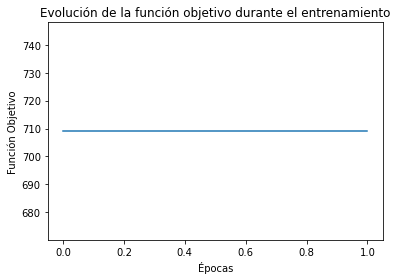

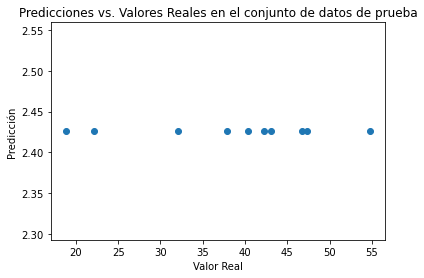

Error cuadrático medio en el conjunto de datos de prueba: 1418.1712156911374


In [30]:
# Entrenar la red neuronal
df_test = pd.read_excel("datos.xlsx", nrows=10)
x = df_test.iloc[:, 1:7].values.tolist()
y = df_test.iloc[:, 7].values.tolist()

print(theta)
print("------------------------")
loss_accum, theta_new = fit(theta, x, y, learning_rate=0.001, epochs=1000)
print(theta_new)
print("------------------------")

# Obtener predicciones en el conjunto de datos de prueba
y_pred = predict(x, theta_new)

# Calcular el error cuadrático medio en el conjunto de datos de prueba
# Calcular el error cuadrático medio en el conjunto de datos de prueba
y_pred_array = np.array(y_pred)
y_array = np.array(y)
mse = ((y_pred_array - y_array) ** 2).mean()


# Graficar la función objetivo a lo largo del entrenamiento
plt.plot(loss_accum)
plt.xlabel('Épocas')
plt.ylabel('Función Objetivo')
plt.title('Evolución de la función objetivo durante el entrenamiento')
plt.show()

# Graficar el error cuadrático medio en el conjunto de datos de prueba
plt.scatter(y, y_pred)
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Predicciones vs. Valores Reales en el conjunto de datos de prueba')
plt.show()

print(f'Error cuadrático medio en el conjunto de datos de prueba: {mse}')
